In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

Here we plot the results of the Figure 2 of the paper. The numbers of FPR, FNR and confidence interval in this plot are originally calulated using the Confidence.ipynb code in MIMIC folder and have been stored in each 'resultsXX' folder, where XX is the random seed that we used to train and test the model. These csv files contains all the mean and confidence intrval of the FNR and FPR analysis of MIMIC-CXR dataset.

In [2]:
FP5_sex = pd.read_csv("./results77/FPR5_FNR_NF_sex.csv")
FP4_sex = pd.read_csv("./results19/FPR4_FNR_NF_sex.csv")
FP3_sex = pd.read_csv("./results38/FPR3_FNR_NF_sex.csv")
FP2_sex = pd.read_csv("./results47/FPR2_FNR_NF_sex.csv")
FP1_sex = pd.read_csv("./results31/FPR1_FNR_NF_sex.csv")
FP_sex = FP1_sex.append([FP2_sex, FP3_sex,FP4_sex, FP5_sex])
F_sex_df = FP_sex.describe()

FP5_age = pd.read_csv("./results77/FPR5_FNR_NF_age.csv")
FP4_age = pd.read_csv("./results19/FPR4_FNR_NF_age.csv")
FP3_age = pd.read_csv("./results38/FPR3_FNR_NF_age.csv")
FP2_age = pd.read_csv("./results47/FPR2_FNR_NF_age.csv")
FP1_age = pd.read_csv("./results31/FPR1_FNR_NF_age.csv")
FP_age = FP1_age.append([FP2_age, FP3_age,FP4_age, FP5_age])
F_age_df = FP_age.describe()

FP5_race = pd.read_csv("./results77/FPR5_FNR_NF_race.csv")
FP4_race = pd.read_csv("./results19/FPR4_FNR_NF_race.csv")
FP3_race = pd.read_csv("./results38/FPR3_FNR_NF_race.csv")
FP2_race = pd.read_csv("./results47/FPR2_FNR_NF_race.csv")
FP1_race = pd.read_csv("./results31/FPR1_FNR_NF_race.csv")
FP_race = FP1_race.append([FP2_race, FP3_race,FP4_race, FP5_race])
F_race_df = FP_race.describe()

FP5_insurance = pd.read_csv("./results77/FPR5_FNR_NF_insurance.csv")
FP4_insurance = pd.read_csv("./results19/FPR4_FNR_NF_insurance.csv")
FP3_insurance = pd.read_csv("./results38/FPR3_FNR_NF_insurance.csv")
FP2_insurance = pd.read_csv("./results47/FPR2_FNR_NF_insurance.csv")
FP1_insurance = pd.read_csv("./results31/FPR1_FNR_NF_insurance.csv")
FP_insurance = FP1_insurance.append([FP2_insurance, FP3_insurance,FP4_insurance, FP5_insurance])
F_insurance_df = FP_insurance.describe()

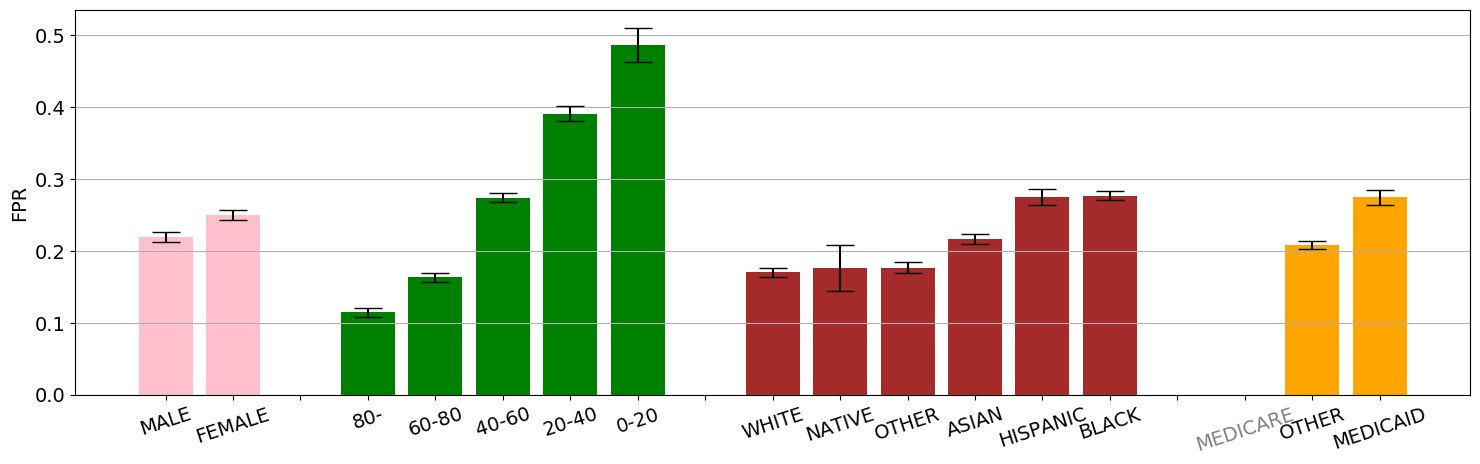

In [17]:


fig, ax = plt.subplots(figsize=(18,5))
fontsize = 14


#-------------------------------------------------------------------

sex = [ 'MALE', 'FEMALE' ]

sex_pos = np.arange(len(sex))

FPR = [F_sex_df.loc['mean']['FPR_M'],   F_sex_df.loc['mean']['FPR_F']]
CI = 1.96 * F_sex_df.loc['std'] / np.sqrt(5)
error = [CI.loc['FPR_M'] ,CI.loc['FPR_F'] ]

ax.bar(sex_pos, FPR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['pink'])

#---------------------------------------------------------------------------


ages = [ '80-', '60-80', '40-60', '20-40', '0-20']

ages_pos = np.arange(3,len(ages)+3)

# This values are calculated in Confidence.ipynb
FPR = [F_age_df.loc['mean']['FPR_80-'],  F_age_df.loc['mean']['FPR_60-80'],
       F_age_df.loc['mean']['FPR_40-60'],F_age_df.loc['mean']['FPR_20-40'],
       F_age_df.loc['mean']['FPR_0-20']]

CI = 1.96 * F_age_df.loc['std'] / np.sqrt(5)
error = [CI.loc['FPR_80-'], CI.loc['FPR_60-80'],
         CI.loc['FPR_40-60'],CI.loc['FPR_20-40'],
         CI.loc['FPR_0-20']]

ax.bar(ages_pos, FPR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['green'])#

#------------------------------------------------------------------------
races = [ 'WHITE', 'NATIVE', 'OTHER', 'ASIAN', 'HIPANIC','BLACK']
race_pos = np.arange(9,len(races)+9)

FPR = [F_race_df.loc['mean']['FPR_White'],F_race_df.loc['mean']['FPR_American'],
       F_race_df.loc['mean']['FPR_Other'],F_race_df.loc['mean']['FPR_Asian'],
       F_race_df.loc['mean']['FPR_Hisp'],F_race_df.loc['mean']['FPR_Black']]

CI = 1.96 * F_race_df.loc['std'] / np.sqrt(5)
error = [CI.loc['FPR_White'], CI.loc['FPR_American'],
         CI.loc['FPR_Other'], CI.loc['FPR_Asian'],
         CI.loc['FPR_Hisp'], CI.loc['FPR_Black']]

ax.bar(race_pos, FPR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['brown'])
#ax.bar( CTEs, race_pos,  yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
#--------------------------------------------------------------------------------------------------
Insurances = [ 'MEDICARE', 'OTHER', 'MEDICAID']

Insurances_pos = np.arange(16,len(Insurances)+16)

FPR = [np.NAN , F_insurance_df.loc['mean']['FPR_Other'],
       F_insurance_df.loc['mean']['FPR_Medicaid']]

CI = 1.96 * F_insurance_df.loc['std'] / np.sqrt(5)
error = [np.NAN , CI.loc['FPR_Other'], CI.loc['FPR_Medicaid']]

ax.bar(Insurances_pos, FPR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['orange'])
#ax.bar(CTEs, Insurances_pos , yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)

labels = ['MALE', 'FEMALE',"",'80-', '60-80', '40-60', '20-40', '0-20',"",'WHITE', 'NATIVE', 'OTHER', 'ASIAN', 'HISPANIC','BLACK','', 'MEDICARE', 'OTHER', 'MEDICAID']
x_pos = np.arange(len(labels))

y_labels = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6']
#ax.set_ylabel('FALSE POSITIVE RATE')
ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels,fontsize = fontsize, rotation=18)
ax.set_yticklabels(y_labels,fontsize = fontsize)
    
my_colors = ['k', 'k','', 'k', 'k','k','k','k', 
      '', 'k', 'k','k','k','k','k','', 'grey','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)    
    
    
    
ax.yaxis.grid(True)
ax.set_ylim(top=0.535)


plt.savefig('./FPRFNR/FPR_NF_dropMedicare.pdf')

In [18]:
[F_race_df.loc['mean']['FPR_White'],F_race_df.loc['mean']['FPR_American'],
       F_race_df.loc['mean']['FPR_Other'],F_race_df.loc['mean']['FPR_Asian'],
       F_race_df.loc['mean']['FPR_Hisp'],F_race_df.loc['mean']['FPR_Black']]

[0.1702,
 0.1758,
 0.17640000000000003,
 0.21660000000000004,
 0.27480000000000004,
 0.27619999999999995]

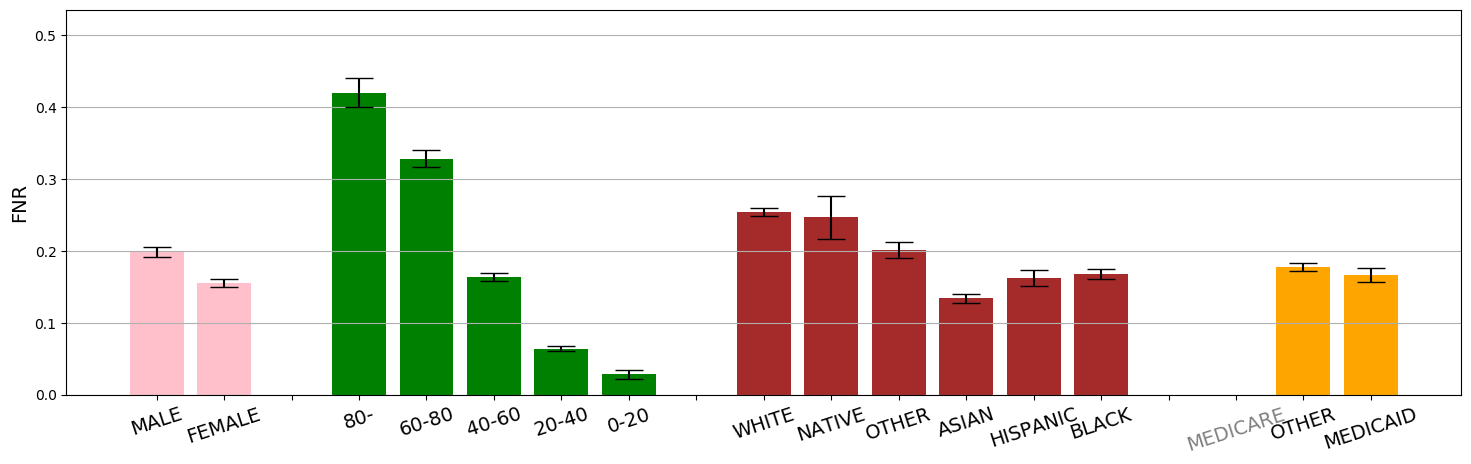

In [19]:


fig, ax = plt.subplots(figsize=(18,5))
fontsize = 14


#-------------------------------------------------------------------

sex = [ 'MALE', 'FEMALE' ]

sex_pos = np.arange(len(sex))

FNR = [F_sex_df.loc['mean']['FNR_M'],   F_sex_df.loc['mean']['FNR_F']]
CI = 1.96 * F_sex_df.loc['std'] / np.sqrt(5)
error = [CI.loc['FNR_M'] ,CI.loc['FNR_F'] ]

ax.bar(sex_pos, FNR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['pink'])

#---------------------------------------------------------------------------


ages = [ '80-', '60-80', '40-60', '20-40', '0-20']

ages_pos = np.arange(3,len(ages)+3)

FNR = [F_age_df.loc['mean']['FNR_80-'],  F_age_df.loc['mean']['FNR_60-80'],
       F_age_df.loc['mean']['FNR_40-60'],F_age_df.loc['mean']['FNR_20-40'],
       F_age_df.loc['mean']['FNR_0-20']]

CI = 1.96 * F_age_df.loc['std'] / np.sqrt(5)
error = [CI.loc['FNR_80-'], CI.loc['FNR_60-80'],
         CI.loc['FNR_40-60'],CI.loc['FNR_20-40'],
         CI.loc['FNR_0-20']]

ax.bar(ages_pos, FNR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['green'])#

#------------------------------------------------------------------------
races = [ 'WHITE', 'NATIVE', 'OTHER', 'ASIAN','HIPANIC', 'BLACK']
race_pos = np.arange(9,len(races)+9)

FNR = [F_race_df.loc['mean']['FNR_White'],F_race_df.loc['mean']['FNR_American'],
       F_race_df.loc['mean']['FNR_Other'],F_race_df.loc['mean']['FNR_Asian'],
       F_race_df.loc['mean']['FNR_Hisp'],F_race_df.loc['mean']['FNR_Black']]

CI = 1.96 * F_race_df.loc['std'] / np.sqrt(5)
error = [CI.loc['FNR_White'], CI.loc['FNR_American'],
         CI.loc['FNR_Other'], CI.loc['FNR_Asian'],
         CI.loc['FNR_Hisp'], CI.loc['FNR_Black']]

ax.bar(race_pos, FNR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['brown'])
#ax.bar( CTEs, race_pos,  yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
#--------------------------------------------------------------------------------------------------
Insurances = [ 'MEDICARE', 'OTHER', 'MEDICAID']

Insurances_pos = np.arange(16,len(Insurances)+16)

FNR = [np.NAN, F_insurance_df.loc['mean']['FNR_Other'],
       F_insurance_df.loc['mean']['FNR_Medicaid']]

CI = 1.96 * F_insurance_df.loc['std'] / np.sqrt(5)
error = [np.NAN, CI.loc['FNR_Other'], CI.loc['FNR_Medicaid']]


ax.bar(Insurances_pos, FNR, yerr=error, align='center', alpha=1, ecolor='black', capsize=10, color=['orange'])
#ax.bar(CTEs, Insurances_pos , yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)

labels = ['MALE', 'FEMALE',"",'80-', '60-80', '40-60', '20-40', '0-20',"",'WHITE', 'NATIVE', 'OTHER', 'ASIAN','HISPANIC','BLACK','', 'MEDICARE', 'OTHER', 'MEDICAID']
x_pos = np.arange(len(labels))

y_labels = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5']
#ax.set_ylabel('FALSE POSITIVE RATE')
ax.set_ylabel('FNR',fontsize = fontsize)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels,fontsize = fontsize, rotation=18)
#ax.set_yticklabels(y_labels,fontsize = fontsize)
#ax.set_title('A) AGE                                                           B)RACE                                                       C)INSURANCE')
#ax.text(1,0.45,'A) AGE                                                                      B)RACE                                                  C)INSURANCE',fontsize = 14.0)
ax.set_ylim(top=0.535)

my_colors = ['k', 'k','', 'k', 'k','k','k','k', 
      '', 'k', 'k','k','k','k','k','', 'grey','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)    
    

ax.yaxis.grid(True)
ax.set_ylim(top=0.535)
plt.savefig('./FPRFNR/FNR_NF_dropMedicare.pdf')

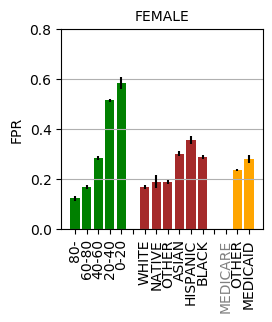

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)



FP_AgSx_df = pd.read_csv("./MIMIC/results/Inter_AgeSex.csv")
FP_RaceSex_df = pd.read_csv("./MIMIC/results/Inter_RaceSex.csv")
FP_SexIns_df = pd.read_csv("./MIMIC/results/Inter_SexIns.csv")


plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# sex
sex = ('80-', '60-80', '40-60', '20-40','0-20','', 'WHITE','NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK'
      ,'', 'MEDICARE','OTHER','MEDICAID')
sex_pos = np.arange(len(sex))
FPR =   (FP_AgSx_df.loc[FP_AgSx_df['Age']=='80-','F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='60-80','F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='40-60','F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='20-40','F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','F'].tolist()[0], np.NAN,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='WHITE','F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='OTHER','F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='ASIAN','F'].tolist()[0], 
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='HISPANIC/LATINO','F'].tolist()[0] ,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','F'].tolist()[0],  np.NAN ,       
         np.NAN,
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Other','F'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','F'].tolist()[0])


error = (FP_AgSx_df.loc[FP_AgSx_df['Age']=='80-','CI_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='60-80','CI_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='40-60','CI_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='20-40','CI_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_F'].tolist()[0], np.NAN,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='WHITE','CI_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='OTHER','CI_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='ASIAN','CI_F'].tolist()[0], 
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='HISPANIC/LATINO','CI_F'].tolist()[0] ,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_F'].tolist()[0],np.NAN ,
         np.NAN,
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Other','CI_F'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','CI_F'].tolist()[0]
        )

color = ['green','green','green','green','green','white','brown','brown','brown','brown','brown','brown','white',
         'orange','orange','orange']

ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['80-', '60-80', '40-60', '20-40','0-20','', 
         'WHITE','NATIVE','OTHER', 'ASIAN','HISPANIC', 'BLACK','',
         'MEDICARE','OTHER','MEDICAID' ]
x_pos = np.arange(len(labels))
y_labels = ['0.0', '0.2', '0.4', '0.6','0.8']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_title('FEMALE', fontsize = fontsize)
ax.set_ylim(top=0.8)
ax.yaxis.grid(True)

my_colors = [ 'k', 'k','k','k','k', 
      '', 'k', 'k','k','k','k','k','', 'grey','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)    

plt.savefig('./FPRFNR/FPR_Int_F_dropMedicare.pdf',bbox_inches='tight')

13
13
13


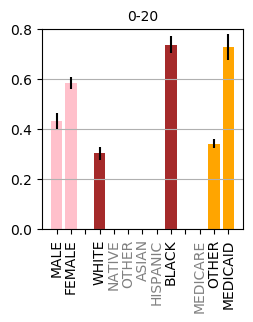

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Note: The gsubgroup with less than 15 patients are removed from the plot. In case of
#FPR plot they are we count the number of paptiont in the test set who actually had less than
# 15 patients with actual 0 No Finding. 

FP_AgSx_df = pd.read_csv("./MIMIC/results/Inter_AgeSex.csv")
FP_RaceAge_df = pd.read_csv("./MIMIC/results/Inter_RaceAge.csv")
FP_AgeIns_df = pd.read_csv("./MIMIC/results/Inter_AgeIns.csv")


plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# sex
# sex = ('M', 'F','', 'WHITE','OTHER', 'NATIVE', 'BLACK','ASIAN','HISPANIC'
#       ,'', 'MEDICARE','OTHER','MEDICAID')

sex = ('M', 'F','', 'WHITE', 'NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK'
      ,'', 'MEDICARE','OTHER','MEDICAID')

sex_pos = np.arange(len(sex))
FPR =   (FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','M'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','White'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','American'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','Other'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','Asian'].tolist()[0], 
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','Hisp'].tolist()[0] ,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','Black'].tolist()[0],np.NAN ,        
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','Medicare'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','Other'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','Medicaid'].tolist()[0])

FPR =   (FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','M'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','White'].tolist()[0],
         np.NAN,
         np.NAN,
         np.NAN, 
         np.NAN ,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','Black'].tolist()[0],np.NAN ,        
         np.NAN ,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','Other'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','Medicaid'].tolist()[0])

error = (FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_M'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_White'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_American'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_Other'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_Asian'].tolist()[0], 
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_Hisp'].tolist()[0] ,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_Black'].tolist()[0],
         np.NAN ,
         np.NAN ,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_Other'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_Medicaid'].tolist()[0]
        )

error = (FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_M'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_White'].tolist()[0],
         np.NAN,
         np.NAN,
         np.NAN, 
         np.NAN ,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_Black'].tolist()[0],

         np.NAN ,
         np.NAN ,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_Other'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_Medicaid'].tolist()[0]
        )

color = ['pink','pink','white','brown','brown','brown','brown','brown','brown','white',
         'orange','orange','orange']
print(len(sex_pos))
print(len(FPR))
print(len(error))
ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)



labels =['MALE', 'FEMALE','', 'WHITE', 'NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK'
      ,'', 'MEDICARE','OTHER','MEDICAID']
x_pos = np.arange(len(labels))
#y_labels = ['0.0', '0.2', '0.4', '0.6']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_title('0-20', fontsize = fontsize)

my_colors = ['k', 'k','', 'k', 'grey','grey','grey','grey', 'k'
      ,'', 'grey','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)


ax.set_ylim(top=0.8)
ax.yaxis.grid(True)

plt.savefig('./FPRFNR/FPR_Int_age_dropMedicare.pdf',bbox_inches='tight')

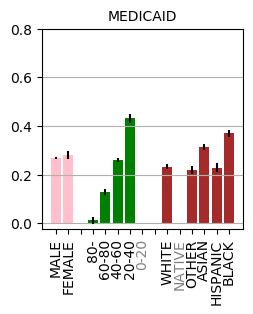

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


FP_SexIns_df = pd.read_csv("./MIMIC/results/Inter_SexIns.csv")
FP_AgeIns_df = pd.read_csv("./MIMIC/results/Inter_AgeIns.csv")
FP_RaceIns_df = pd.read_csv("./MIMIC/results/Inter_RaceIns.csv")

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# sex
sex = ('MALE','FEMALE','','80-', '60-80', '40-60', '20-40','0-20','','WHITE', 'NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK')
sex_pos = np.arange(len(sex))
FPR =   (FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','M'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','F'].tolist()[0],np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='80-','Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='60-80','Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='40-60','Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='20-40','Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','Medicaid'].tolist()[0], np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='WHITE','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='OTHER','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='ASIAN','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='HISPANIC/LATINO','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','Medicaid'].tolist()[0] )


FPR =   (FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','M'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','F'].tolist()[0],np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='80-','Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='60-80','Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='40-60','Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='20-40','Medicaid'].tolist()[0],
         np.NAN, np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='WHITE','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='OTHER','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='ASIAN','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='HISPANIC/LATINO','Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','Medicaid'].tolist()[0] )

color = ['pink','pink','white','green','green','green','green','green','white','brown','brown','brown','brown','brown','brown']


error =   (FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','CI_M'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','CI_F'].tolist()[0],np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='80-','CI_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='60-80','CI_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='40-60','CI_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='20-40','CI_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_Medicaid'].tolist()[0], np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='WHITE','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='OTHER','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='ASIAN','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='HISPANIC/LATINO','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','CI_Medicaid'].tolist()[0] )

error =   (FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','CI_M'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','CI_F'].tolist()[0],np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='80-','CI_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='60-80','CI_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='40-60','CI_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='20-40','CI_Medicaid'].tolist()[0],
         np.NAN, np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='WHITE','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='OTHER','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='ASIAN','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='HISPANIC/LATINO','CI_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','CI_Medicaid'].tolist()[0] )


ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['MALE','FEMALE' ,'','80-', '60-80', '40-60', '20-40','0-20','', 
         'WHITE', 'NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK']
x_pos = np.arange(len(labels))
#y_labels = ['0.0', '0.2', '0.4', '0.6']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_title('MEDICAID', fontsize = fontsize)
ax.yaxis.grid(True)

my_colors = ['k', 'k','', 'k', 'k','k','k','grey'
      ,'', 'k','grey','k','k','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

ax.set_ylim(top=0.8)
ax.yaxis.grid(True)

plt.savefig('./FPRFNR/FPR_Int_Ins_dropMedicare.pdf',bbox_inches='tight')

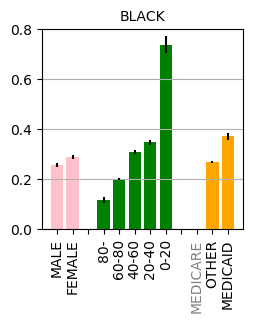

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)



FP_RaceSex_df = pd.read_csv("./MIMIC/results/Inter_RaceSex.csv")
FP_RaceAge_df = pd.read_csv("./MIMIC/results/Inter_RaceAge.csv")
FP_RaceIns_df = pd.read_csv("./MIMIC/results/Inter_RaceIns.csv")


plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# sex
sex = ('MALE','FEMALE','','80-', '60-80', '40-60', '20-40','0-20','', 'Medicaid','Medicare', 'Other')
sex_pos = np.arange(len(sex))
FPR =   (FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','M'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','F'].tolist()[0],np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='80-','Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='60-80','Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='40-60','Black'].tolist()[0], 
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','Black'].tolist()[0], np.NAN,
         np.NAN ,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','Other'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','Medicaid'].tolist()[0])



error =  (FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_M'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_F'].tolist()[0],np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='80-','CI_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='60-80','CI_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='40-60','CI_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','CI_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_Black'].tolist()[0], np.NAN,
         np.NAN ,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','CI_Other'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','CI_Medicaid'].tolist()[0])



color = ['pink','pink','white','green','green','green','green','green','white','orange','orange','orange']



ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['MALE','FEMALE' ,'','80-', '60-80', '40-60', '20-40','0-20','', 
         'MEDICARE','OTHER', 'MEDICAID']
x_pos = np.arange(len(labels))
#y_labels = ['0.0', '0.2', '0.4', '0.6']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_title('BLACK', fontsize = fontsize)
ax.set_ylim(top=0.8)
ax.set_ylim(top=0.8)
ax.yaxis.grid(True)

my_colors = ['k', 'k','', 'k', 'k','k','k','k'
      ,'', 'grey','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.savefig('./FPRFNR/FPR_Int_race_dropMedicare.pdf',bbox_inches='tight')

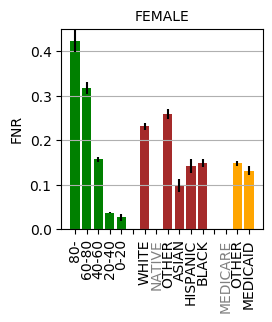

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

# Note: The gsubgroup with less than 15 patients are removed from the plot. In case of
#FNR plot they are we count the number of paptiont in the test set who actually had less than
# 15 patients with actual 1 No Finding. 


FP_AgSx_df = pd.read_csv("./MIMIC/results/Inter_AgeSex_FNR_FPR.csv")
FP_RaceSex_df = pd.read_csv("./MIMIC/results/Inter_RaceSex_FNR_FPR.csv")
FP_SexIns_df = pd.read_csv("./MIMIC/results/Inter_SexIns_FNR_FPR.csv")


plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# sex
sex = ('80-', '60-80', '40-60', '20-40','0-20','', 'WHITE','NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK'
      ,'', 'MEDICARE','OTHER','MEDICAID')
sex_pos = np.arange(len(sex))
FPR =   (FP_AgSx_df.loc[FP_AgSx_df['Age']=='80-','FNR_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='60-80','FNR_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='40-60','FNR_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='20-40','FNR_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','FNR_F'].tolist()[0], np.NAN,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='WHITE','FNR_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','FNR_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='OTHER','FNR_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='ASIAN','FNR_F'].tolist()[0], 
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='HISPANIC/LATINO','FNR_F'].tolist()[0] ,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','FNR_F'].tolist()[0],  np.NAN ,       
         np.NAN,
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Other','FNR_F'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','FNR_F'].tolist()[0])


error = (FP_AgSx_df.loc[FP_AgSx_df['Age']=='80-','CI_FNR_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='60-80','CI_FNR_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='40-60','CI_FNR_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='20-40','CI_FNR_F'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_FNR_F'].tolist()[0], np.NAN,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='WHITE','CI_FNR_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FNR_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='OTHER','CI_FNR_F'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='ASIAN','CI_FNR_F'].tolist()[0], 
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='HISPANIC/LATINO','CI_FNR_F'].tolist()[0] ,
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_FNR_F'].tolist()[0],np.NAN ,
         np.NAN,
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Other','CI_FNR_F'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','CI_FNR_F'].tolist()[0]
        )

color = ['green','green','green','green','green','white','brown','brown','brown','brown','brown','brown','white',
         'orange','orange','orange']

ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['80-', '60-80', '40-60', '20-40','0-20','', 
         'WHITE','NATIVE','OTHER', 'ASIAN','HISPANIC', 'BLACK','',
         'MEDICARE','OTHER','MEDICAID' ]
x_pos = np.arange(len(labels))
y_labels = ['0.0', '0.2', '0.4', '0.6','0.8']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('FNR',fontsize = fontsize)
ax.set_title('FEMALE', fontsize = fontsize)
ax.set_ylim(top=0.45)
ax.yaxis.grid(True)

my_colors = ['k', 'k','k', 'k','k','', 'k', 'grey','k','k','k','k'
      ,'', 'grey','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

ax.set_ylim(top=0.45)
ax.yaxis.grid(True)

plt.savefig('./FPRFNR/FNR_Int_F_dropMedicare.pdf',bbox_inches='tight')

(0.207, 0.149, nan, 0.382, 0.35700000000000004, 0.177, 0.071, 0.0, nan, nan, 0.13, 0.128)


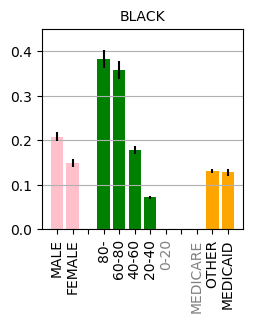

In [24]:
import matplotlib.pyplot as plt
import numpy as np


FP_RaceSex_df = pd.read_csv("./MIMIC/results/Inter_RaceSex_FNR_FPR.csv")
FP_RaceAge_df = pd.read_csv("./MIMIC/results/Inter_AgeRace_FNR_FPR.csv")
FP_RaceIns_df = pd.read_csv("./MIMIC/results/Inter_RaceIns_FNR_FPR.csv")

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# sex
sex = ('MALE','FEMALE','','80-', '60-80', '40-60', '20-40','0-20','', 'Medicaid','Medicare', 'Other')
sex_pos = np.arange(len(sex))
FPR =   (FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','FNR_M'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','FNR_F'].tolist()[0],np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='80-','FNR_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='60-80','FNR_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='40-60','FNR_Black'].tolist()[0], 
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','FNR_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_Black'].tolist()[0], np.NAN,
         np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','FNR_Other'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','FNR_Medicaid'].tolist()[0])

print(FPR)

error =  (FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_FNR_M'].tolist()[0],
         FP_RaceSex_df.loc[FP_RaceSex_df['race']=='BLACK/AFRICAN AMERICAN','CI_FNR_F'].tolist()[0],np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='80-','CI_FNR_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='60-80','CI_FNR_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='40-60','CI_FNR_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='20-40','CI_FNR_Black'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_Black'].tolist()[0], np.NAN,
         np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','CI_FNR_Other'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','CI_FNR_Medicaid'].tolist()[0])



color = ['pink','pink','white','green','green','green','green','green','white','orange','orange','orange']

ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['MALE','FEMALE' ,'','80-', '60-80', '40-60', '20-40','0-20','', 
         'MEDICARE','OTHER', 'MEDICAID']
x_pos = np.arange(len(labels))
#y_labels = ['0.0', '0.2', '0.4', '0.6']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_title('BLACK', fontsize = fontsize)
ax.set_ylim(top=0.45)
ax.yaxis.grid(True)

my_colors = ['k', 'k','', 'k','k','k','k','grey'
      ,'', 'grey','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

ax.set_ylim(top=0.45)
ax.yaxis.grid(True)

plt.savefig('./FPRFNR/FNR_Int_race_dropMedicare.pdf',bbox_inches='tight')

13
13
13


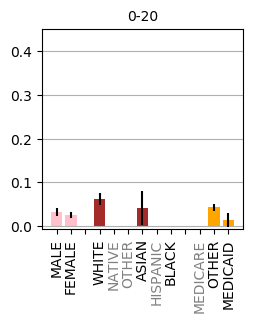

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)



FP_AgSx_df = pd.read_csv("./MIMIC/results/Inter_AgeSex_FNR_FPR.csv")
FP_RaceAge_df = pd.read_csv("./MIMIC/results/Inter_AgeRace_FNR_FPR.csv")
FP_AgeIns_df = pd.read_csv("./MIMIC/results/Inter_AgeIns_FNR_FPR.csv")


plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# sex
# sex = ('M', 'F','', 'WHITE','OTHER', 'NATIVE', 'BLACK','ASIAN','HISPANIC'
#       ,'', 'MEDICARE','OTHER','MEDICAID')

sex = ('M', 'F','', 'WHITE', 'NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK'
      ,'', 'MEDICARE','OTHER','MEDICAID')

sex_pos = np.arange(len(sex))
FPR =   (FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','FNR_M'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','FNR_F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_White'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_American'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_Other'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_Asian'].tolist()[0], 
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_Hisp'].tolist()[0] ,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_Black'].tolist()[0],np.NAN ,        
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','FNR_Medicare'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','FNR_Other'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','FNR_Medicaid'].tolist()[0])

FPR =    (FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','FNR_M'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','FNR_F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_White'].tolist()[0],
         np.NAN,
         np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_Asian'].tolist()[0], 
         np.NAN ,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','FNR_Black'].tolist()[0],np.NAN ,        
         np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','FNR_Other'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','FNR_Medicaid'].tolist()[0])

error = (FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_FNR_M'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_FNR_F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_White'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_American'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_Other'].tolist()[0],
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_Asian'].tolist()[0], 
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_Hisp'].tolist()[0] ,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_Black'].tolist()[0],
         np.NAN ,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_FNR_Medicare'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_FNR_Other'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_FNR_Medicaid'].tolist()[0]
        )

error = (FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_FNR_M'].tolist()[0],
         FP_AgSx_df.loc[FP_AgSx_df['Age']=='0-20','CI_FNR_F'].tolist()[0], np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_White'].tolist()[0],
         np.NAN,
         np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_Asian'].tolist()[0], 
         np.NAN,
         FP_RaceAge_df.loc[FP_RaceAge_df['age']=='0-20','CI_FNR_Black'].tolist()[0],

         np.NAN ,
         np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_FNR_Other'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_FNR_Medicaid'].tolist()[0]
        )

color = ['pink','pink','white','brown','brown','brown','brown','brown','brown','white',
         'orange','orange','orange']
print(len(sex_pos))
print(len(FPR))
print(len(error))
ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['MALE', 'FEMALE','', 'WHITE', 'NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK'
      ,'', 'MEDICARE','OTHER','MEDICAID']
x_pos = np.arange(len(labels))
#y_labels = ['0.0', '0.2', '0.4', '0.6']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_ylim(top=0.45)
ax.set_title('0-20', fontsize = fontsize)
ax.yaxis.grid(True)


my_colors = ['k', 'k','', 'k', 'grey','grey','k','grey','k'
      ,'', 'grey','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

ax.set_ylim(top=0.45)
ax.yaxis.grid(True)

plt.savefig('./FPRFNR/FNR_Int_age_dropMedicare.pdf',bbox_inches='tight')

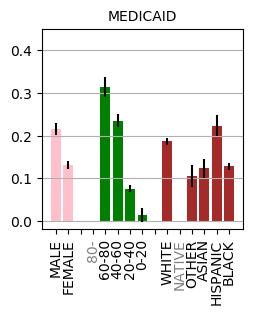

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


FP_SexIns_df = pd.read_csv("./MIMIC/results/Inter_SexIns_FNR_FPR.csv")
FP_AgeIns_df = pd.read_csv("./MIMIC/results/Inter_AgeIns_FNR_FPR.csv")
FP_RaceIns_df = pd.read_csv("./MIMIC/results/Inter_RaceIns_FNR_FPR.csv")

plt.rcdefaults()

fig, ax = plt.subplots(figsize=(2.6,2.6))
fontsize = 10

# sex
sex = ('MALE','FEMALE','','80-', '60-80', '40-60', '20-40','0-20','','WHITE', 'NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK')
sex_pos = np.arange(len(sex))
FPR =   (FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','FNR_M'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','FNR_F'].tolist()[0],np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='80-','FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='60-80','FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='40-60','FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='20-40','FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','FNR_Medicaid'].tolist()[0], np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='WHITE','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='OTHER','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='ASIAN','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='HISPANIC/LATINO','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','FNR_Medicaid'].tolist()[0] )

FPR =   (FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','FNR_M'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','FNR_F'].tolist()[0],np.NAN,
         np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='60-80','FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='40-60','FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='20-40','FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','FNR_Medicaid'].tolist()[0], np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='WHITE','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='OTHER','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='ASIAN','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='HISPANIC/LATINO','FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','FNR_Medicaid'].tolist()[0] )

color = ['pink','pink','white','green','green','green','green','green','white','brown','brown','brown','brown','brown','brown']


error =   (FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','CI_FNR_M'].tolist()[0],
         FP_SexIns_df.loc[FP_SexIns_df['Insurance']=='Medicaid','CI_FNR_F'].tolist()[0],np.NAN,
         np.NAN,
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='60-80','CI_FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='40-60','CI_FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='20-40','CI_FNR_Medicaid'].tolist()[0],
         FP_AgeIns_df.loc[FP_AgeIns_df['age']=='0-20','CI_FNR_Medicaid'].tolist()[0], np.NAN,
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='WHITE','CI_FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='AMERICAN INDIAN/ALASKA NATIVE','CI_FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='OTHER','CI_FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='ASIAN','CI_FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='HISPANIC/LATINO','CI_FNR_Medicaid'].tolist()[0],
         FP_RaceIns_df.loc[FP_RaceIns_df['race']=='BLACK/AFRICAN AMERICAN','CI_FNR_Medicaid'].tolist()[0] )




ax.bar(sex_pos, FPR, yerr=error, align='center',color=color)


labels =['MALE','FEMALE' ,'','80-', '60-80', '40-60', '20-40','0-20','', 
         'WHITE', 'NATIVE','OTHER','ASIAN','HISPANIC', 'BLACK']
x_pos = np.arange(len(labels))
#y_labels = ['0.0', '0.2', '0.4', '0.6']
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = fontsize,  rotation=90)
#ax.set_yticklabels(y_labels, fontsize = fontsize)
#ax.invert_yaxis()  # labels read top-to-bottom
#ax.set_ylabel('FPR',fontsize = fontsize)
ax.set_title('MEDICAID', fontsize = fontsize)
ax.yaxis.grid(True)

# my_colors = ['k', 'k','', 'k', 'k','k','k','grey'
#       ,'', 'k','grey','k','k','k','k']

# for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
#     ticklabel.set_color(tickcolor)

ax.set_ylim(top=0.45)
ax.yaxis.grid(True)


my_colors = ['k', 'k','', 'grey', 'k','k','k','k'
      ,'', 'k','grey','k','k','k','k']

for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

plt.savefig('./FPRFNR/FNR_Int_Ins_dropMedicare.pdf',bbox_inches='tight')